<div style="border:solid green 2px; padding: 20px">
    
<b>Борис, привет!</b> Мы рады тебя видеть на территории код-ревьюеров. Ты проделал большую работу над проектом, но давай познакомимся и сделаем его еще лучше! У нас тут своя атмосфера и несколько правил:


1. Меня зовут Александр Матвеевский. Я работаю код-ревьюером, моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных.
2. Общаемся на ты.
3. Если хочешь написать, спросить - не нужно стесняться. Только выбери свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку.  
5. У тебя неограниченное количество попыток для сдачи проекта.  
6. Let's Go!

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
Всё это поможет выполнить повторную проверку твоего проекта оперативнее. Если будут какие-нибудь вопросы по моим комментариям, пиши, будем разбираться вместе :)    
    
---

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Отличная практика - расписывать цель и основные этапы своими словами (этот навык очень поможет на фильнальном проекте). Хорошо было бы добавить ход и цель исследования. Пример можно посмотреть в самом первом проекте (Музыка городов)
</div>

### Откройте файл с данными и изучите общую информацию. 

**1.1 Импортируем бибилиотеки, откроем файл и выведем общую информацию о файле**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Предварительно видно, часть данных пропущена. Только 8 столбцов (атрибутов) заполненны полностью. Наибольшее кол-во пропусков в атрибуте, характеризующий принадлежность к аппаратментам. По типам данных видно, что "is_apartment" - не булев тип, хотя в описании к набору указано обратное, также обнадеживает то, что все атрибуты, которые можно использовтаь в расчетах имеют тип int или float64, т.е. площадь кухни - это число, а не текст типа "около 10 кв.м" и такие данные дополнително не нужно будет обрабатывать.
Не совсем понятно, почему общее число этажей в доме, балконов, количество парков и водоемов рядом - число с плавающей точкой, а этаж квартиры - целое число (но это на самом деле неважно, просто отметим это) 

<div class="alert alert-block alert-success">✔️
    
__Комментарий от ревьюера №1__
    
Отлично! Первый взгляд на данные есть, план намечен.

**1.2 Посмотрим на данные в табличном виде**

In [2]:
display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**1.3 Построим общие гистограммы**

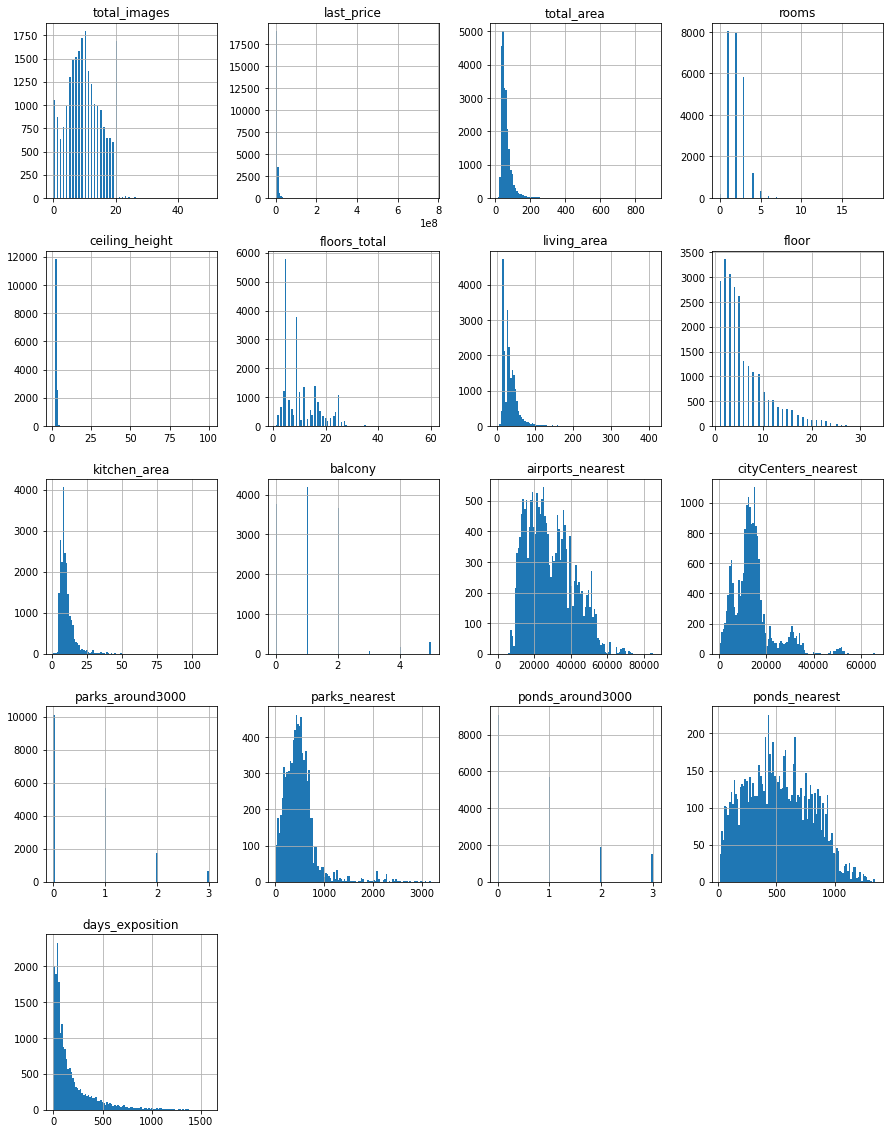

In [3]:
# построим общие гистограммы
data.hist(figsize=(15, 20), bins=100)
plt.show();

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
Такие предупреждения можно убрать 2 способами:
    
1. В конец кода добавить `plt.show()`, но для этого нужно вызвать библиотеку matplotlib
2. В конец кода добавить `;`
    
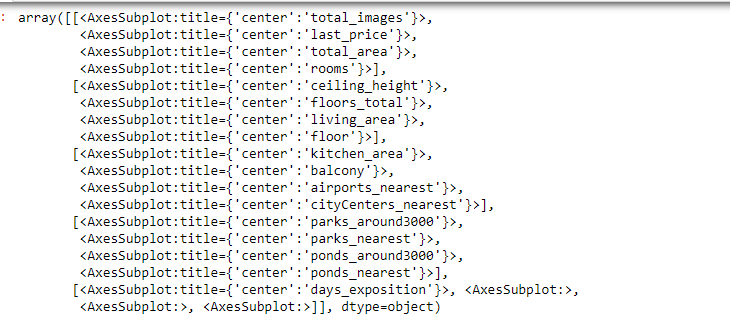
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Сделал, спасибо. Но работает и без ";".</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Немного не так, тут либо `plt.show()`, либо `;` =) Одновременно нету толку)
</div>

В целом данные практически "нормальные", местами есть выбросы, но этому есть объяснение, напрмиер 'floors_total' - явный выброс 5 и 9, что связано с наиболее популярной этажностью многоквартиных домов, построенных . А реновация в 2017 году еще не началась, тем более в Санкт-Петербурге 

**1.4 Посмотрим на общую статистику**

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Предварительные выводы из общей информации о данных**

Таким образом, основные претенденты для предобработки (для замены пустых значений, где это возможно) "выявлены":
ceiling_height 
floors_total
living_area
is_apartment
kitchen_area
balcony
locality_name
airports_nearest
cityCenters_nearest 
parks_around3000
parks_nearest
ponds_around3000
ponds_nearest
days_exposition

Также есть некоторые странности из таблицы общей статистики:

**rooms** - минимальное значение 0 комнат,  максимальное значение - 19. total_area - максимальное значение 900 кв.м. Быстрый гуглеж (ой, простите, яндекснайдетсявсёж) говорит о том, что в то время наибольшая квартира в СпБ имела площадь 539 кв.м, квартира 903,5 кв.м появилась в 2021 году. Хотя год постройки здания 2006. Т.е. мб, действительно такая 19-ти комнатная квартира существует. 

**celling_height** - минимальное значение 1 м. Это квартира в Шире? Максимально 100?

**cityCenters_nearest** - максимальное значение 65,9 км. Возможно, неверно указано расположение квартиры. Но автоматический расчет расстояния до центра верный.

**days_exposition** - максимальное значение 1580 дней или 4,3 года. Либо недвижимость оставляет желать лучшего и на неё нет спроса, либо сведения о продаже недвижимости были неактуальны, не подтверждались, не обновлялись 

Также из общей статистики видно, что в общем и целом этаж недвижимости меньше общей этажности зданий, площадь кухни меньше жилой площади (т.е. данные не поменялись местами). Но в частных случаях может быть обратное, возможно, стоит проверить отдельно.

In [5]:
error_area = data.query('total_area <= living_area or total_area <= kitchen_area or (kitchen_area + living_area) > total_area')
if len(error_area) == 0:
    print('Все в порядке')
else:
    print('Количество объектов, которые не удовлетворяют площадным характеристикам -', len(error_area), 'их доля от общей выборки -', len(error_area) / len(data))


Количество объектов, которые не удовлетворяют площадным характеристикам - 66 их доля от общей выборки - 0.0027849276340773874


In [6]:
error_floor = data.query('floor > floors_total')
if len(error_area) == 0:
    print('Количество объектов, которые не удовлетворяют условиям этажности -', len(error_floor), 'их доля от общей выборки ', len(error_floor) / len(data))
else:
    print('Все в порядке')

Все в порядке


Т.е в менее 1% объектов что-то напутали с указанием площадей. С этажами все в порядке в части соответствия этажа объекта и этажности здания

### Предобработка данных

**2.1 Определим количество пропусков в каждом столбце, упорядочим по убыванию**

In [7]:
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Проверить колличество пропусков в % можно вот так: 
    
    
    pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

<div class="alert alert-info"> <b>Комментарии студента:</b> Буду иметь ввиду про условное форматирование столбцов</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Рад помочь))
</div>

In [8]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


**Выводы из данных о пропусках**

**is_apartment** - скорее всего для "не апартаментов" данный атрибут не заполнялся "по умолчанию", т.к. всё же апартаменты - "жилое" в нежилом здании и в основной массе продаются как жилые помещения в жилых зданиях, хотя таковыми не являются (термин "апартаменты" введен в обиход с 2012 года). Но есть ощущение, что мало кто понимает до конца, что это такое, и возможно, что верить этот атрибут совершенно недостоверен. Преверим позже отдельно, сколько там True и False. Кстати, может быть есть связь между атрибутами is_apartament и studio, т.к. возможно объединялись 2 базы, в одной из которых не было атрибута is_apartment (более старая, например), но в каждой был атрибут studio, который == по смыслу is appartment

**park_nearest, ponds_nearest** - более 60% пропусков. Больше похоже на ошибку при обработке картографических данных или ошибке выгрузки. С другой стороны явно не указано, откуда взяты данные (ручной или автоматический ввод из ГИС). Можно заменить на максимальное по городу

**parks_around3000, ponds_around3000** - возможно также ошибка выгрузки, но и вполне реально то, что в радиусе 3 км нет парка (стоит отметить, что не описании не указано, что понимается под парком. Если это парк, как элемент благоустроенной территории на балансе муниципалитета, то вполне вероятно, что чатсь данных будет пустая, т.к. подразумевалось 0 парков. Например, от дома в п. Бугры, ул. Новая д.7 до ближайшего парка "Сад Ивана Фомина" 3,8 км. Если парк - группа зеленых насаждений, то подобные пропуски - явно ошибка. С другой стороны явно не указано, откуда взяты данные (ручной или автоматический ввод из ГИС)

**airports_nearest, cityCenters_nearest** - пропуски вызваны ошибкой при выгрузке или ошибкой при обработке картографических данных. Можно заменить на максимальное по городу.

**days_exposition** - очень странные пропуски, т.к. данные сведения должны автоматически считаться в системе и не заполняются вручную. Теоретически пропуск в атрибуте возможен, если на момент выгрузки из БД объявление "висит и не снято". Можно попробовать заменить на разницу между наибольшей датой в наборе и датой из first_day_exposition, она вероятнее всего будет максимально приближена к дате выгрузки. С другой  стороны, в описании указано, что мы работаем с "данными сервиса Яндекс Недвижимость — архив объявлений за несколько лет". Т.е. это архив, куда подразумевается перенос "закрытых", "завершенных" объявлений. 

**kitchen_area, living_area** - площадные характеристики могут не знать собственники (редко) или перекупы (часто). Пропуски могут быть характерны для коммунальных квартир (но такой признак отсутсвует) или недвижимость не обладает такоим элементом как "кухня" или "жилое помещение", что характерно либо для студии (нет кухонь), либо для апартаментов (нет жилой площади). Надо проверить и принять решение на какие значения заменить

**balcony** - вероятнее всего пропуски стоят там, где действительно нет балконов. Судя по гистограмме значения в столбце - целые числа и 0 (хотя тип float64). Пропуски можно заменить на 0

**ceiling_height** - пропуски из-за ошибки ручного ввода, т.е. атрибуты "сознательно" не заполнялись. Можно заменить на среднее для здания с аналогичной этажностью  в городе

**locality_name** - крайне мало пропусков, скорее всего по-умолчанию заполняющими считалось, что и так всем понятно, что недвижимость в СпБ



**2.2 Замена пропусков**

**2.2.1 locality_name**

Проверим, какое самое распространенное наименование местоположения недвижимости (ответ:Санкт-Петербург). 

Заменим все значения NaN на "Санкт-Петербург"

In [9]:
data.groupby('locality_name')['total_area'].count().sort_values(ascending=False)

locality_name
Санкт-Петербург       15721
посёлок Мурино          522
посёлок Шушары          440
Всеволожск              398
Пушкин                  369
                      ...  
поселок Каложицы          1
поселок Кирпичное         1
поселок Коммунары         1
поселок Коробицыно        1
село Шум                  1
Name: total_area, Length: 364, dtype: int64

In [10]:
data['locality_name']= data['locality_name'].fillna('Санкт-Петербург')

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Если пропусков меньше 5-8% их лучше сразу удалять, дабы сэкономить время
</div>

**2.2.2 ceiling_height**

Проверим, какое среднее и медианное значение высоты потолков в замисимости от города, а также рассчитаем общее среднее и медианное значение для всего набора (хотя уже рассчитано выше в общей описательной статистике)

In [11]:
pivot_floors_total = data.pivot_table(index='locality_name', values='ceiling_height', aggfunc=['count','mean', 'median', 'min', 'max'])
pivot_floors_total.columns = ['count', 'mean', 'median', 'min', 'max']
print(pivot_floors_total.sort_values('max'))
print(data['ceiling_height'].mean(), '- общее среднее')
print(data['ceiling_height'].median(), '- общая медиана')
print(data['ceiling_height'].min(), '- общее минимальное')
print(data['ceiling_height'].max(), '- общее максимальное')

                              count  mean  median   min   max
locality_name                                                
городской посёлок Свирьстрой      1  2.45    2.45  2.45  2.45
поселок Рабитицы                  1  2.50    2.50  2.50  2.50
деревня Котлы                     1  2.50    2.50  2.50  2.50
посёлок Дзержинского              1  2.50    2.50  2.50  2.50
посёлок Гаврилово                 2  2.50    2.50  2.50  2.50
...                             ...   ...     ...   ...   ...
село Никольское                   0   NaN     NaN   NaN   NaN
село Паша                         0   NaN     NaN   NaN   NaN
село Рождествено                  0   NaN     NaN   NaN   NaN
село Старая Ладога                0   NaN     NaN   NaN   NaN
село Шум                          0   NaN     NaN   NaN   NaN

[364 rows x 5 columns]
2.77149889685604 - общее среднее
2.65 - общая медиана
1.0 - общее минимальное
100.0 - общее максимальное


В части городов вообще отсутствуют значения о высоте потолков, поэтому заменить на среднее по городу не представляется возможным. Заменим на общую медиану по всему набору

In [12]:
data['ceiling_height']= data['ceiling_height'].fillna(data['ceiling_height'].median())

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Некоторые столбцы можно поменять на значения, относительно своего района (например высота пололков). Вот так
    
    
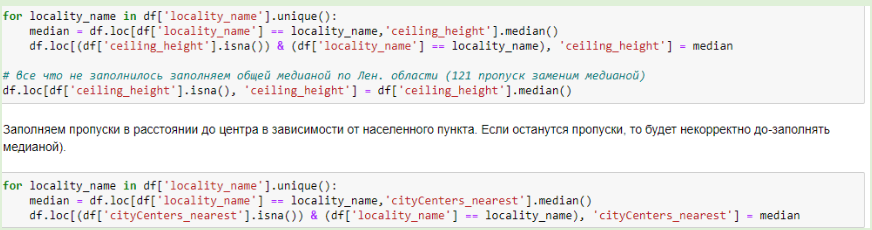
    
Если хочешь - дарю свой код =)
</div>

**2.2.3 is_apartment**

Проверим, сколько апартаментов всего в наборе. Таких всего 50. Поэтому заменим все пропуски на False

In [13]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [14]:
data['is_apartment'] = data['is_apartment'].fillna(False)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Тут согласен
</div>

**2.2.4 balcony**

Заменим пропуски на 0

In [15]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [16]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

**2.2.5 floors_total**

Заменим пропуски в этажности здания на значение этажа, который указан в объявлени

In [17]:
data.iloc[457] #floors_total = NaN

total_images                              4
last_price                        9788348.0
total_area                             70.8
first_day_exposition    2015-08-01T00:00:00
rooms                                     2
ceiling_height                         2.65
floors_total                            NaN
living_area                            38.4
floor                                    12
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                          10.63
balcony                                 0.0
locality_name               Санкт-Петербург
airports_nearest                    37364.0
cityCenters_nearest                  8322.0
parks_around3000                        2.0
parks_nearest                         309.0
ponds_around3000                        2.0
ponds_nearest                         706.0
days_exposition                       727.0
Name: 457, dtype: object

In [18]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])
#data[data['floors_total'].isna()]
data.iloc[457] #проверка замены 

total_images                              4
last_price                        9788348.0
total_area                             70.8
first_day_exposition    2015-08-01T00:00:00
rooms                                     2
ceiling_height                         2.65
floors_total                           12.0
living_area                            38.4
floor                                    12
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                          10.63
balcony                                 0.0
locality_name               Санкт-Петербург
airports_nearest                    37364.0
cityCenters_nearest                  8322.0
parks_around3000                        2.0
parks_nearest                         309.0
ponds_around3000                        2.0
ponds_nearest                         706.0
days_exposition                       727.0
Name: 457, dtype: object

**2.2.7 days_exposition**

Логичне всего заменить пропуски на медианное значение для города

In [19]:
avrg_days_exposition = data.groupby('locality_name')['days_exposition'].median()

unique_locality_name = data['locality_name'].unique()

for un in unique_locality_name:
    data.loc[data['locality_name'] == un, 'days_exposition'] = data['days_exposition'].fillna(avrg_days_exposition[un])
    

**2.2.8 kitchen_area living_area**

Аналогично предыдущему пункту

In [20]:
avrg_kitchen_area = data.groupby('locality_name')['kitchen_area'].median()

for unun in unique_locality_name:
    data.loc[data['locality_name'] == unun, 'kitchen_area'] = data['kitchen_area'].fillna(avrg_kitchen_area[unun])

In [21]:
avrg_living_area = data.groupby('locality_name')['living_area'].median()

for ununun in unique_locality_name:
    data.loc[data['living_area'] == ununun, 'living_area'] = data['living_area'].fillna(avrg_living_area[ununun])

Но не все значения NaN заменились на медианные значения, всё равно есть остались пропуски, т.к. для части городов такая информация вообще отсутсвует. Количество пропусков days_exposition сократилось с 3181 до 80. Количество пропусков kitchen_area сократилось с 2278 до 19, количество пропусков в living_area не изменилось. Не понятно, не пойму в чем ошибка. Но большая часть данных заменена.

In [22]:
data.isna().sum().sort_values(ascending=False)

parks_nearest           15620
ponds_nearest           14589
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
living_area              1903
days_exposition            80
kitchen_area               19
locality_name               0
balcony                     0
total_images                0
last_price                  0
studio                      0
is_apartment                0
floor                       0
floors_total                0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [23]:
#data[data['living_area'].isna()]

**2.2.6 ххх_area**

Всего 66 объектов не совпадают по своим площадным характеристикам. Обработаем их на шаге поиска  и замены аномалий

**Вывод по п.2.2 Замена пропусков**

Заменены пропуски в стобцах с отсутсвующими значениями атрибутов: "признак "апартамент"", наименованием местоположения, высотой потолков, наличием балконов, общей этажности зданий. На первый взгляд замена пустых знычений этих признаков выглядит вполне логичной:

1) замена пустых is_apartment на False, т.к. настоящих апартаментов в наборе всего 50 из 2775

2) замена пустых locality_name на "Санкт-Петербург", т.к. пустых местоположений 49, а значений "санкт-петербург" более 17 тыс.

3) замена пустых balcony на 0, скорее всего, если стоит пропуск, то на объекте действительно нет балкона

4) замена пустых ceiling_height на медианное по набору

5) замена пустых floors_total на соответствующее значение из floor, где отсутствуют пропуски

6) замена пустых значений kitchen_area, living_area, days_exposition на медианное по городу (не все значения)

Не заменены пропуски в картографических данных, т.к. скорее всего данные выгружены с ошибками

По идее правильнее бы было производить замену пропусков после поиска аномалий и замены выбросов, но в последовательности действий в описании работы не так.


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Замена пропусков проведена верно
</div>

**2.3 Типы данных**

In [24]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [25]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,...,9.9,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Необходимо заменить типы данных:

- first_day_exposition на дату в формате ГГГГ-ММ-ДД, сейчас это object
- floors_total, balcony, parks_around3000, ponds_around3000 на int, т.к. это целочисленные значения
- last_price на int, т.к. дробная часть = 0
- атрибуты расстояний перевести в int, т.к. дробная часть = 0
- days_exposition в int
- можно округлить площадные характристики до 2 знака после запятой total_area, kitchen_area, living_area и значения ceiling_height

**2.3.1 Замена на дату**

In [26]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

**2.3.2 Замена на int**

Осуществим замену с помощью цикла

In [27]:
to_int = ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'last_price', 'cityCenters_nearest', 'ponds_nearest', 'parks_nearest', 'days_exposition']
for col in to_int:
    data[col] = data[col].astype('int', errors = 'ignore')
#data['floors_total'] = data['floors_total'].astype('int')
#data['balcony'] = data['balcony'].astype('int')
#data['parks_around3000'] = data['parks_around3000'].astype('int', errors = 'ignore')
#data['ponds_around3000'] = data['ponds_around3000'].astype('int',errors = 'ignore')

**2.3.3 Округление**

Осуществим округление с помощью цикла

In [28]:
to_round = ['total_area', 'kitchen_area', 'living_area', 'ceiling_height']
for col in to_round:
    data[col] = data[col].round(2)

**2.4 Поиск и замена повторов, неявные дубликаты**

In [29]:
#дубликатов нет
data.duplicated().sum()

0

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Проверка на дубликаты - основа предобработки данных
</div>

**2.4.1 Неявные дубликаты в наименовании местоположения**

Можно создать справочник, содержащий обозначения типов городов (поселок, деревня, станция). Разбить строки на списки слов и удалить по справочнику лишнее, оставив только наименования.
Можно разделить каждую строку в столбце на слова и оставить только то, что начинается с заглавной. Напишем функцию

In [30]:
def short_loc_name(row):
    split_loc_name = row.split() #строка в список подстрок
    new_loc_name = [] #пустой список
    
    for word in split_loc_name:
        if word[0].isupper():
            new_loc_name.append(word)
    
    for letter in new_loc_name:
        new_loc_name = ''.join(letter)
    
    return new_loc_name

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличная функция
</div>

In [31]:
data['short_locality_name'] = data['locality_name'].apply(short_loc_name)

In [32]:
data['short_locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Бор', 'Гатчина', 'Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'Девяткино', 'Металлострой', 'Лебяжье',
       'Сиверский', 'Молодцово', 'Кузьмоловский', 'Ропша', 'Павловск',
       'Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'Сестрорецк', 'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое',
       'Заклинье', 'Торковичи', 'Первомайское', 'Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Свет', 'Сланцы', 'Путилово',
       'Ивангород', 'Шлиссельбург', 'Никольское', 'Зеленогорск', 'Оржицы',
       'Кальтино', 'Романовка', 'Бугры', 'Рощино', 'Кириши', 'Луга',
       'Волосово', 'Отрадное', 'Павлово', 'Оредеж', 'Копорье',
       'Молодёжное', 'Тихвин', 'Победа', 'Нурма', 'Синявино', 'Тосно',
       'Стрельна', 'Бокситогорск', 'Александровская', 'Лопухинка',
       'Пикалёво', 'Терв

In [33]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,short_locality_name
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,Санкт-Петербург
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург


**2.4.2 Поиск аномалий**

In [34]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,21796.000000,23699.000000,23680.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,23619.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.671463,34.457852,5.892358,10.468816,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,170.329078
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.595802,22.030445,4.885249,5.637110,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,207.217485
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.200000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.600000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,11.500000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,201.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Совет: Рекомендую не удалять данные "на глаз". Лучше посмотреть на выбросы и аномалии данных математически, и удалить их. В этом поможет метод boxplot()
</div>

Самая аномальная аномалия - высота потолков 100 м. Также скорее всего там, где указана высота 20-30 метров, на самом деле высота 2.0-3.0 метра. Маскимальная высота потолков 5.1 метра. Предположим, что есть какая-то квартира, где высота 10 метров

В СпБ есть 1 здание выше 60 этаже (Лахта-центр), второе по высоте - 42 этажа, 3-е - 37 этажей (кстати жилое)

Про площадь рассуждали выше, вполне себе может быть и 900 кв.м

Максимальная цена в наборе -  763 млн тоже вполне приемлемо

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

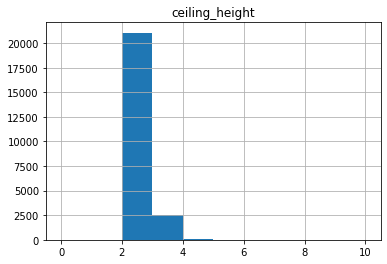

In [35]:
data.hist(column='ceiling_height', bins=10, range=(0, 10))

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

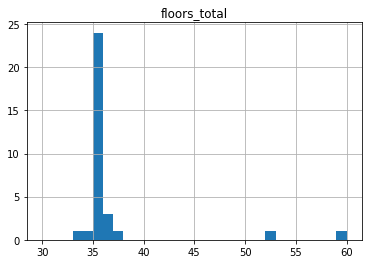

In [36]:
data.hist(column='floors_total', bins=30, range=(30, 60))

Судя по гистограмме с этажностью в целом всё в порядке, кроме здания в 53 этажа, информации о котором нет в википедии =) Возможно это ошибка, но можем ей принебречь.

Заменим все значения высоты потолков выше 10 м на h/10. Посмотрим сначала на такие объекты. Оказывается, что есть объекты с высотой 10.3 м и 14 м. Поэтому, корректнее заменить только те значения, которые более 20.0

In [37]:
data.loc[data['ceiling_height'] >10].sort_values('ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,short_locality_name
22309,20,5300000,45.0,2017-09-30,1,10.3,16,15.5,15,False,...,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0,Санкт-Петербург
15061,19,5600000,56.4,2018-05-11,2,14.0,14,32.4,5,False,...,2,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0,Санкт-Петербург
17496,15,6700000,92.9,2019-02-19,3,20.0,17,53.2,14,False,...,5,Санкт-Петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,95.0,Санкт-Петербург
20507,12,5950000,60.0,2018-02-19,2,22.6,14,35.0,11,False,...,1,Санкт-Петербург,27028.0,12570.0,0.0,NaN,0.0,NaN,40.0,Санкт-Петербург
5076,0,3850000,30.5,2018-10-03,1,24.0,5,19.5,1,True,...,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0,Санкт-Петербург
355,17,3600000,55.2,2018-07-12,2,25.0,5,32.0,2,False,...,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0,Гатчина
18545,6,3750000,43.0,2019-03-18,2,25.0,5,29.0,3,False,...,0,Санкт-Петербург,27054.0,8033.0,1.0,540.0,0.0,NaN,12.0,Санкт-Петербург
11285,0,1950000,37.0,2019-03-20,1,25.0,5,17.0,4,False,...,2,Луга,NaN,NaN,NaN,NaN,NaN,NaN,18.0,Луга
9379,5,3950000,42.0,2017-03-26,3,25.0,5,30.0,2,False,...,0,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,95.0,Санкт-Петербург
14382,9,1700000,35.0,2015-12-04,1,25.0,5,20.0,2,False,...,1,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,206.0,Свет


Апартаменты 25 кв.м с высотой 100 м за 150 млн в 35 км от аеропорта. Хмм...ну-ну

Проведем замену всех потолков выше 20 м

In [38]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Всё верно
</div>

In [39]:
#data.loc[data['ceiling_height'] >10].sort_values('ceiling_height')
data.iloc[22869] #проверка замены на 100 метровых потолках, кажется работает

total_images                              0
last_price                         15000000
total_area                             25.0
first_day_exposition    2018-07-25 00:00:00
rooms                                     1
ceiling_height                         10.0
floors_total                              5
living_area                            14.0
floor                                     5
is_apartment                           True
studio                                False
open_plan                             False
kitchen_area                           11.0
balcony                                   5
locality_name               Санкт-Петербург
airports_nearest                    34963.0
cityCenters_nearest                  8283.0
parks_around3000                        1.0
parks_nearest                         223.0
ponds_around3000                        3.0
ponds_nearest                          30.0
days_exposition                        19.0
short_locality_name         Санк

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

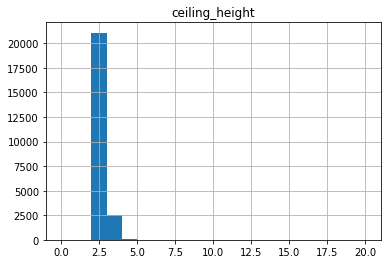

In [40]:
data.hist(column='ceiling_height', bins=20, range=(0, 20))

можно также было бы воспользоваться методом where

**Заменили только аномальные значения высоты потолков**

Данные удалять не стал, т.к. их доля очень мала, и в других атрибутах этих объектов содержится ценная информация.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
    
Второй раздел сделан хорошо. Проверены основные возможные проблемы в данных.

### Посчитайте и добавьте в таблицу новые столбцы

In [41]:
#цeна одного квадратного метра
data['one_metre_price'] = round(data['last_price'] / data['total_area'], 1)
#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
data['weekday'] = data['first_day_exposition'].dt.weekday
#месяц публикации объявления;
data['month'] = data['first_day_exposition'].dt.month
#год публикации объявления;
data['year'] = data['first_day_exposition'].dt.year

#тип этажа квартиры (значения — «‎первый», «последний», «другой»);
data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'
data.loc[data['floor_category'].isna(), 'floor_category'] = 'другой'

#расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
data['cityCenters_km'] = round(data['cityCenters_nearest'] / 1000, 0)
#data['cityCenters_km'] = data['cityCenters_km'].round(0).astype('int', errors='ignore')

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Совет: обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем. Обрати внимание на метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex. 
</div>

In [42]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,short_locality_name,one_metre_price,weekday,month,year,floor_category,cityCenters_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,95.0,Санкт-Петербург,120370.4,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,81.0,Шушары,82920.8,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2.0,574.0,558.0,Санкт-Петербург,92785.7,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,3.0,234.0,424.0,Санкт-Петербург,408176.1,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,Санкт-Петербург,100000.0,1,6,2018,другой,8.0


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Этот раздел выполнен качественно
</div>

### Проведите исследовательский анализ данных

**4.1 Изучение параметров**

In [43]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_metre_price,weekday,month,year,cityCenters_km
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,21796.000000,23699.000000,23680.000000,23699.000000,...,18181.000000,8079.000000,18181.000000,9110.000000,23619.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,18180.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.698721,10.671463,34.457852,5.892358,10.468816,0.591080,...,0.611408,490.804555,0.770255,517.980900,170.329078,9.942166e+04,2.569307,6.400101,2017.367146,14.184818
std,5.682529,1.088701e+07,35.654083,1.078405,0.253208,6.595802,22.030445,4.885249,5.637110,0.959298,...,0.802074,342.317995,0.938346,277.720643,207.217485,5.030680e+04,1.789082,3.491561,1.039771,8.616194
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,1.118000e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.200000,0.000000,...,0.000000,288.000000,0.000000,294.000000,45.000000,7.658545e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.600000,0.000000,...,0.000000,455.000000,1.000000,502.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,11.500000,1.000000,...,1.000000,612.000000,1.000000,729.000000,201.000000,1.142564e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,7.630000e+08,900.000000,19.000000,14.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


In [44]:
#посомтрим на введенную категорию
data['floor_category'].value_counts()

другой       17363
последний     3447
первый        2889
Name: floor_category, dtype: int64

**Среднестатистический объект (квартира) имеет следующие характристики:**

- цена: 6,5 млн 
- кол-во комнат: 2
- общая площадь: 60,3 кв.м
- жилая площадь: 34,4 кв.м
- площадь кухни: 10,5 кв.м
- балконов: в большинстве случаев без балкона
- высота потолков: 2,7 м
- этаж: 6й в 10-ти этажном доме - категория "другой"
- расстояние до центра города: 14,2 км
- расстояние до ближайшего парка: 490 м,
- расстояние до ближайшего водоема: 518 м,
- среднее время "жизни" объявления: 170 дней
- такое объявление было "опубликовано" во второй половине дня в среду в июле 2017 года (но это особенности выгрузки данных (набора))

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>],
       [<AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>,
        <AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>],
       [<AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_exposition'}

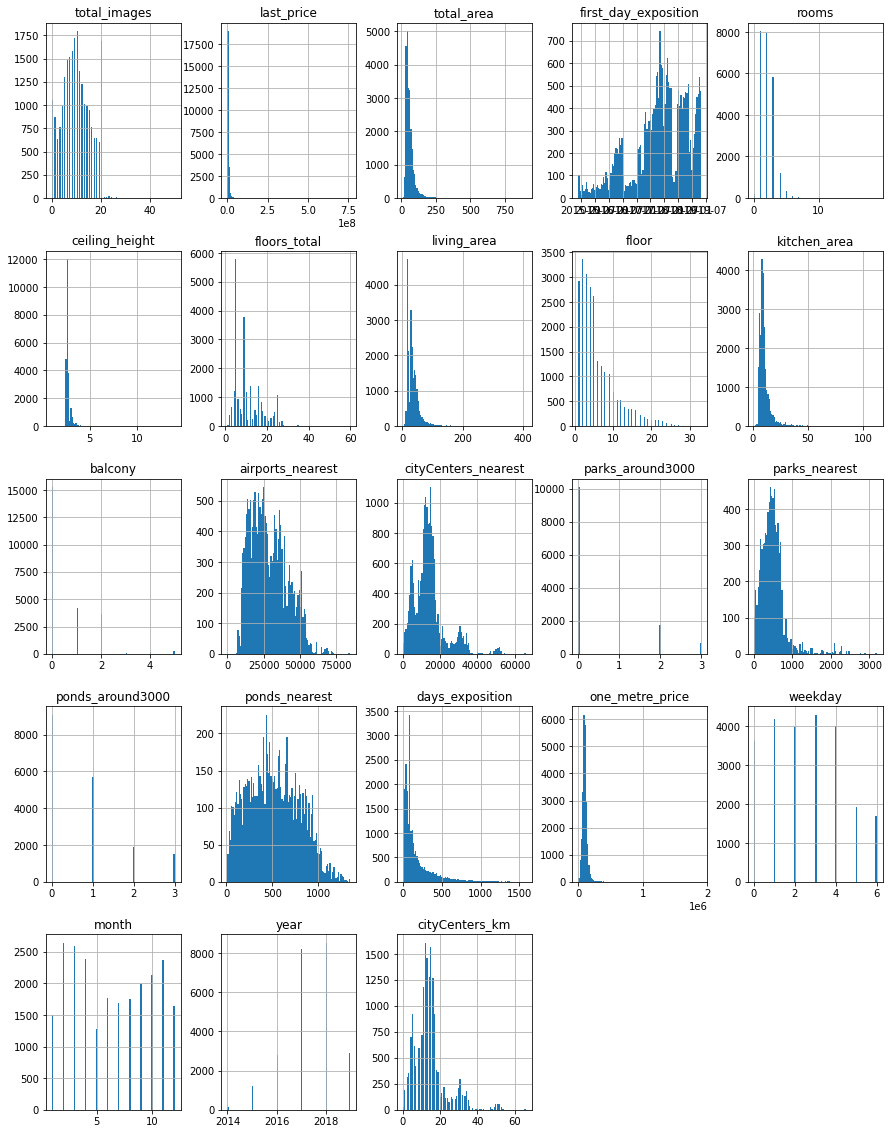

In [45]:
data.hist(figsize=(15, 20), bins=100)

In [46]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_metre_price,weekday,month,year,cityCenters_km
total_images,1.000000,0.104473,0.115352,0.099288,0.050128,0.011147,0.104780,0.031340,0.010532,-0.029303,...,0.021120,-0.008347,-0.011553,-0.003034,-0.038950,0.132780,-0.010433,0.005043,0.140411,-0.047120
last_price,0.104473,1.000000,0.653675,0.363343,0.256458,-0.006993,0.566492,0.026576,0.026958,-0.025362,...,0.151058,-0.016414,0.159996,-0.084809,0.064003,0.736499,0.001550,0.002779,-0.043089,-0.206995
total_area,0.115352,0.653675,1.000000,0.758344,0.342083,-0.075652,0.939537,-0.024754,0.029633,-0.072653,...,0.164689,-0.021497,0.162346,-0.097969,0.116289,0.301960,-0.004695,0.004920,-0.079912,-0.231255
rooms,0.099288,0.363343,0.758344,1.000000,0.211263,-0.227227,0.845977,-0.150862,0.000399,-0.147286,...,0.137257,-0.054549,0.092693,-0.057689,0.099781,0.055420,-0.004134,-0.004469,-0.055418,-0.184374
ceiling_height,0.050128,0.256458,0.342083,0.211263,1.000000,-0.073399,0.330304,-0.039064,0.083077,0.009109,...,0.197492,-0.054342,0.166407,-0.101690,0.078223,0.267358,-0.016266,-0.001335,-0.047232,-0.257684
floors_total,0.011147,-0.006993,-0.075652,-0.227227,-0.073399,1.000000,-0.169256,0.678109,-0.026292,0.069522,...,-0.252489,0.096972,-0.122960,0.039055,-0.042594,0.147838,0.013187,0.015753,0.008409,0.018570
living_area,0.104780,0.566492,0.939537,0.845977,0.330304,-0.169256,1.000000,-0.097210,0.026969,-0.056231,...,0.184453,-0.050167,0.148933,-0.081674,0.111115,0.226346,-0.005605,-0.002483,-0.072696,-0.231075
floor,0.031340,0.026576,-0.024754,-0.150862,-0.039064,0.678109,-0.097210,1.000000,-0.013294,0.036940,...,-0.163784,0.073045,-0.076312,0.024850,-0.032418,0.129068,0.012347,0.019387,0.004915,0.008574
is_apartment,0.010532,0.026958,0.029633,0.000399,0.083077,-0.026292,0.026969,-0.013294,1.000000,-0.003657,...,0.020767,-0.033410,0.023989,0.003357,0.010954,0.044725,-0.009492,0.002369,0.009413,0.003555
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.009109,0.069522,-0.056231,0.036940,-0.003657,1.000000,...,-0.030202,0.009134,0.000939,0.002606,-0.019852,0.015636,-0.000843,0.000976,0.011961,-0.007468


**4.1.1 Общая площадь**

<AxesSubplot:>

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

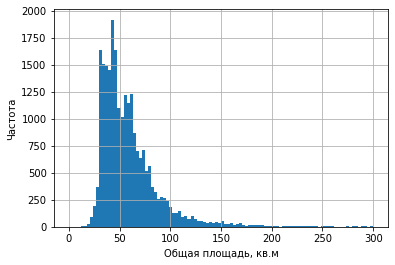

In [47]:
#гистограмма и общая описательная статистика
display(data['total_area'].hist(bins=100, range=(0,300)))
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Частота')
display(data['total_area'].describe())

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Я бы советовал сократить range и тогда мы сможем увидеть пиковые значения. 
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Честно говоря, на каждом графике я отдельно менял "масштаб", чтобы подобрать наиболее наглядный пример.

Далее в обзоре про жилую площадь эти пики типовых однушек и двушек видны</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Хорошо) Теперь понял
</div>

<AxesSubplot:>

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

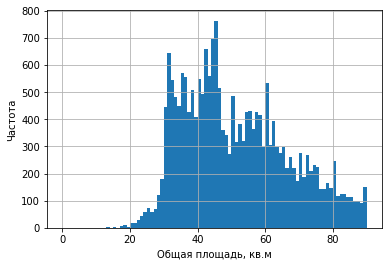

In [48]:
#гистограмма с измененным масштабом
display(data['total_area'].hist(bins=90, range=(0,90)))
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Частота')
display(data['total_area'].describe())

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

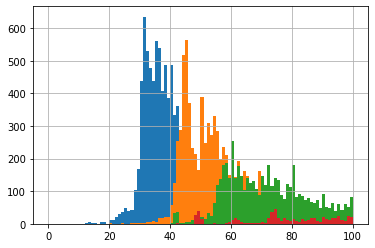

In [49]:
display(data.loc[data['rooms'] == 1]['total_area'].hist(bins=50, range=(0,50)))
display(data.loc[data['rooms'] == 2]['total_area'].hist(bins=50, range=(20,70)))
display(data.loc[data['rooms'] == 3]['total_area'].hist(bins=100, range=(0,100)))
display(data.loc[data['rooms'] == 4]['total_area'].hist(bins=100, range=(0,100)))

Распеределение выглядит нормально. Среднее значение близко к медиане и находится в 3-м квартиле. 75% объектов из выборки имеют площадь менее 69 кв.м 

Пики в распределении объясняются тем, что в основной массе жилье  - типовое жилье с установленной проектами характеристиками. Так, напрмиер, в наборе больше всего 2-х комнатных квартир площадью около 44-46 кв.м. что соовтетствует площади 2-х комнатных квартир в "хрущевках" и "брежневках" (типовые 5-ти этажные МКД).

Квартиры общей площадью менее 20 кв.м могут являться примерами коммунальных квартир, где учитывается только площадь илых помещений 

**4.1.2 Жилая площадь**

<AxesSubplot:>

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

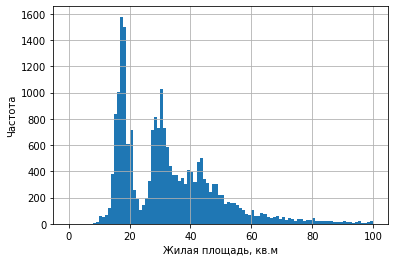

In [50]:
#гистограмма и общая описательная статистика
display(data['living_area'].hist(bins=100, range=(0,100)))
plt.xlabel('Жилая площадь, кв.м')
plt.ylabel('Частота')
display(data['living_area'].describe())

Распеределение выглядит нормально, если учитывать тот факт, что 1,2,3- и далее комнатные квартиры имеют жилые площади в определенных диапазонах. Поэтому на гисторамме 3 пика.

Каких-либо особенностей нет

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

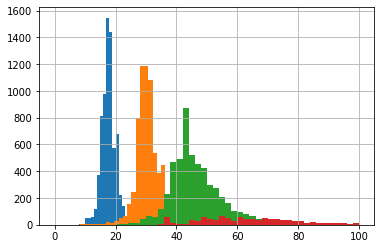

In [51]:
display(data.loc[data['rooms'] == 1]['living_area'].hist(bins=50, range=(0,50)))
display(data.loc[data['rooms'] == 2]['living_area'].hist(bins=50, range=(0,70)))
display(data.loc[data['rooms'] == 3]['living_area'].hist(bins=50, range=(0,100)))
display(data.loc[data['rooms'] == 4]['living_area'].hist(bins=50, range=(0,100)))

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличная визуализация =)
</div>

**4.1.3 Площадь кухни**

<AxesSubplot:>

count    23680.000000
mean        10.468816
std          5.637110
min          1.300000
25%          7.200000
50%          9.600000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64

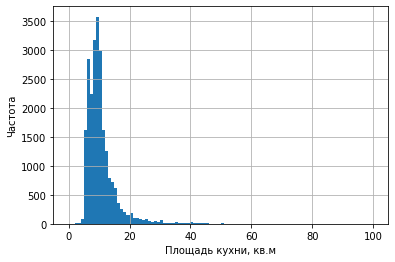

In [52]:
#гистограмма и общая описательная статистика
display(data['kitchen_area'].hist(bins=100, range=(0,100)))
plt.xlabel('Площадь кухни, кв.м')
plt.ylabel('Частота')
display(data['kitchen_area'].describe())

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

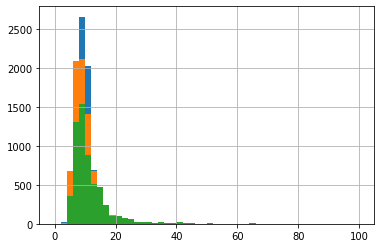

In [53]:
display(data.loc[data['rooms'] == 1]['kitchen_area'].hist(bins=50, range=(0,100)))
display(data.loc[data['rooms'] == 2]['kitchen_area'].hist(bins=50, range=(0,100)))
display(data.loc[data['rooms'] == 3]['kitchen_area'].hist(bins=50, range=(0,100)))

Распеределение выглядит нормально. Площадь кухни глобально не зависит от кол-ва комнат

Каких-либо особенностей нет

**4.1.4 Цена объекта**

<AxesSubplot:>

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

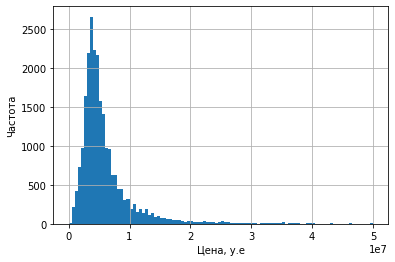

In [54]:
#гистограмма и общая описательная статистика
display(data['last_price'].hist(bins=100, range=(0, 50000000)))
plt.xlabel('Цена, у.е')
plt.ylabel('Частота')
display(data['last_price'].describe())

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

Text(0, 0.5, 'Частота')

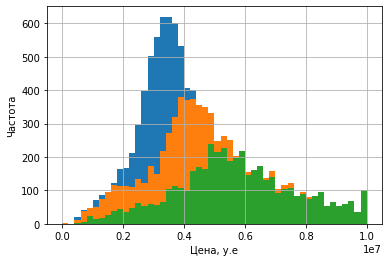

In [55]:
display(data.loc[data['rooms'] == 1]['last_price'].hist(bins=50, range=(0, 10000000)))
display(data.loc[data['rooms'] == 2]['last_price'].hist(bins=50, range=(0, 10000000)))
display(data.loc[data['rooms'] == 3]['last_price'].hist(bins=50, range=(0, 10000000)))
plt.xlabel('Цена, у.е')
plt.ylabel('Частота')

Распеределение выглядит нормально. Также нормальны распределения по цене в зависимости от кол-ва комнат.

Каких-либо особенностей нет. 

Цена на гистограмме указана в у.е., т.к. единица измерения в наборе не указана (все понимают, что это руб.)

**4.1.5 Количество комнат**

<AxesSubplot:>

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

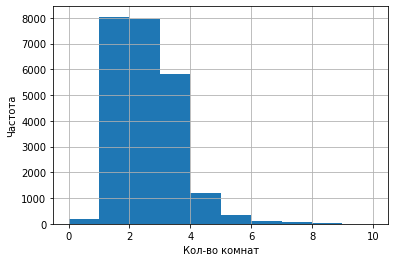

In [56]:
#гистограмма и общая описательная статистика
display(data['rooms'].hist(bins=10, range=(0,10)))
plt.xlabel('Кол-во комнат')
plt.ylabel('Частота')
display(data['rooms'].describe())

Как отмечалось выше, в наборе в основном собрана информация о 1,2,3-х комнатных объектах жилья. Есть примеры 10-ти и более комнатных объектов. Скорее всего это не ошибка в выгрузке, т.к. такие объекты действительно есть на рынке, но их крайне мало.

**4.1.6 Высота потолков**

<AxesSubplot:>

count    23699.000000
mean         2.698721
std          0.253208
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

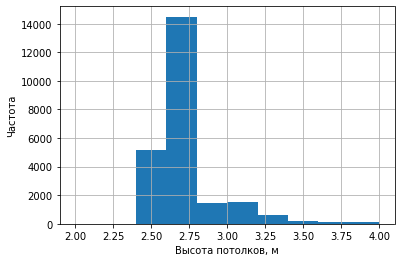

In [57]:
#гистограмма и общая описательная статистика
display(data['ceiling_height'].hist(bins=10, range=(2, 4)))
plt.xlabel('Высота потолков, м')
plt.ylabel('Частота')
display(data['ceiling_height'].describe())

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

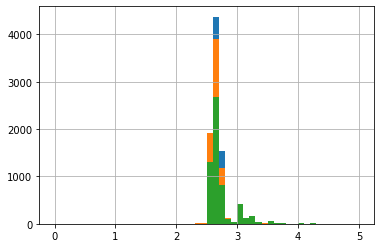

In [58]:
display(data.loc[data['rooms'] == 1]['ceiling_height'].hist(bins=50, range=(0, 5)))
display(data.loc[data['rooms'] == 2]['ceiling_height'].hist(bins=50, range=(0, 5)))
display(data.loc[data['rooms'] == 3]['ceiling_height'].hist(bins=50, range=(0, 5)))

<AxesSubplot:xlabel='rooms'>

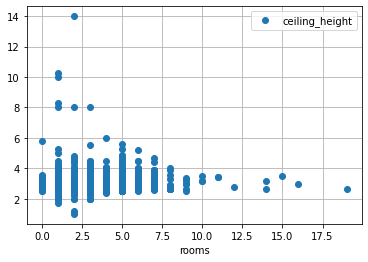

In [59]:
data.plot(x='rooms', y='ceiling_height', style='o', grid=True)

Больгинство квартир имеют высоту потолков от 2,5 до 3-х метров. Есть отдельные примеры с более высокими потолками 

**4.1.7 Этажность (этаж, тип этажа, общее кол-во жтажей в доме)**

<AxesSubplot:>

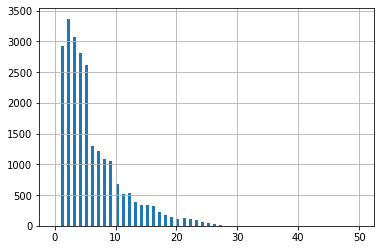

In [60]:
#этаж
data['floor'].hist(bins=100, range=(0, 50))

<AxesSubplot:>

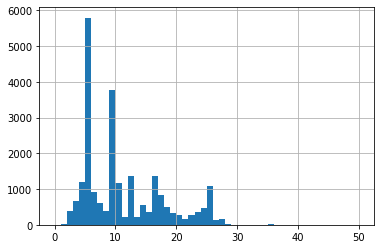

In [61]:
#общее кол-во этажей
data['floors_total'].hist(bins=50, range=(0, 50))

<AxesSubplot:>

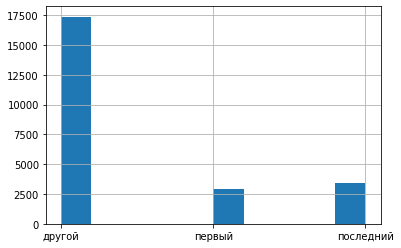

In [62]:
#категория
data['floor_category'].hist()

Большая часть объектов расположена на 2-5 этажах, далее на 6-9-х.  Меньшая часть объектов расположена на 1-м или последнем этаже. По распределению общей этажности зданий хорошо видно, что в наборе значительная часть объектов расположена в 5 или 9-ти этажных зданиях.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Полученные данные соответствуют реалиям
</div>

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23680 non-null  float64       
 13  balcony         

**4.1.8 Расстояния до объектов (центр, парк, водоём)**

<AxesSubplot:>

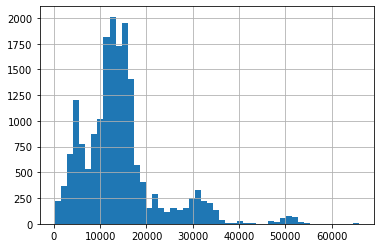

In [64]:
#расстояние до центра
data['cityCenters_nearest'].hist(bins=50)

<AxesSubplot:>

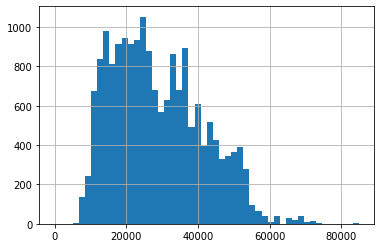

In [65]:
#расстояние до аэропорта
data['airports_nearest'].hist(bins=50)

<AxesSubplot:>

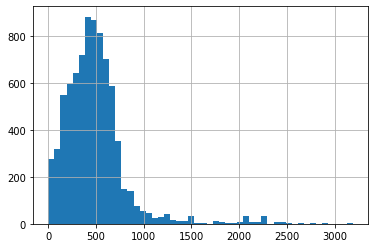

In [66]:
#расстояние до парка
data['parks_nearest'].hist(bins=50)

<AxesSubplot:>

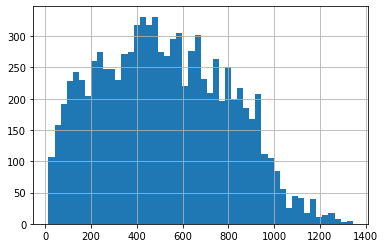

In [67]:
#расстояние до водоёма
data['ponds_nearest'].hist(bins=50)

In [68]:
data['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Распределение значений данных зарактеристик выглядит в целом нормально. Часть объектов находится прямо в центре (100 метров от географического центра). Большинство объектов расположено на расстоянии 10 км и более. Значительная часть объектов (там где это указано) "обеспечена" парками и водоемами, которые находятся в радиусе 1 км от объектов.

Расстояние до аэропорта в среднем 28 км, при этом есть объекты, в информации о которых указано, что они находятся центре аэропорта, что сомнительно и является скорее всего ошибкой. 

**4.1.9 Дата публикации**

<AxesSubplot:>

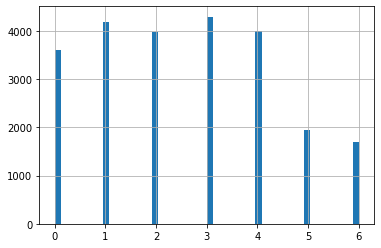

In [69]:
data['weekday'].hist(bins=50)

<AxesSubplot:>

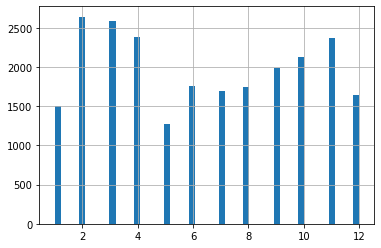

In [70]:
data['month'].hist(bins=50)

Чаще всего объявления публикуются в будние, в выходные реже. Самый популярные месяцы для публикации - февраль, март, апрель, ноябрь. В январе, мае и летние месяцы объявления публикуются реже, возможно связано с периодом отпусков и снижением наплыва трудовых мигрантов.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

А в мае все на огороде, не до квартир)
</div>

**4.2 Быстрота продаж квартир**

<AxesSubplot:>

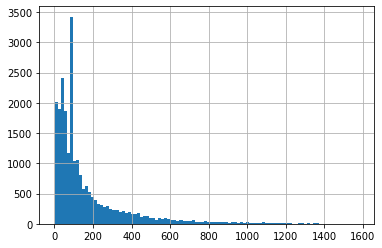

In [71]:
data['days_exposition'].hist(bins=100)

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Давай тут уменьшим range, возможно тут есть интересные аномалии (от 0 до 100 например)
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Изменение range проводилось ниже. Проглядел немного пик 60 дней, т.е. 2 месяца.

Т.о. имеем 3 пика 45, 60, 90 дней. и микропик 30 дней. Какие-то подсознательно важные для продавцов даты =)
    
Или просто это объявления агентов/перекупов и т.д. + рекламные объявления, которые снимаются через определенные промежутки времени. Не смогли продать - снимаем объявление
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

С природой таких пропусков согласен
</div>

<AxesSubplot:>

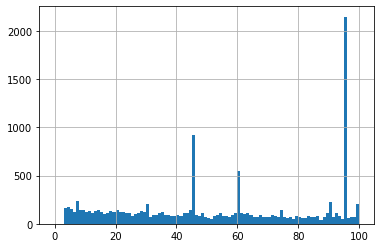

In [72]:
data['days_exposition'].hist(bins=100, range=(0,100))

<AxesSubplot:>

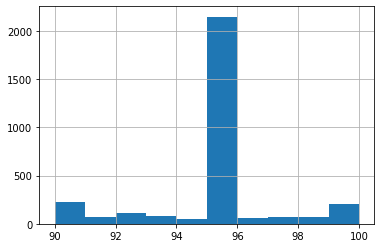

In [73]:
data['days_exposition'].hist(bins=10, range=(90,100))

<AxesSubplot:>

count    23619.000000
mean       170.329078
std        207.217485
min          1.000000
25%         45.000000
50%         95.000000
75%        201.000000
max       1580.000000
Name: days_exposition, dtype: float64

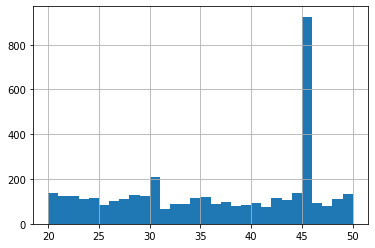

In [74]:
display(data['days_exposition'].hist(bins=30, range=(20,50)))
display(data['days_exposition'].describe())
#display(data['days_exposition'].median())
#display(data['days_exposition'].mean())

In [75]:
exp_fast = data.query('days_exposition < 31')
exp_faster = data.query('15 <days_exposition < 31')
exp_the_fastest = data.query('days_exposition <= 14')
exp_week = data.query('days_exposition <= 7')
print(exp_fast['days_exposition'].count() / 23619, exp_faster['days_exposition'].count() / 23619, exp_the_fastest['days_exposition'].count() / 23619)
print(exp_week['days_exposition'].count(), exp_week['days_exposition'].count() / 23619)

0.1587281425970617 0.07786104407468564 0.07553241034760151
856 0.036242008552436596


Мединное значение равно 95 дней, что также соотвтствует пику в распеределении. Более 2000 объявлений были закрыты ровно через 95 дней. 75% квартир проданы за 200 дней или 6,5 месяцев. Среднее значение равно 170, что говорит о "длинном" хвосте из значений более 200 (до 1,5 тыс).

45 дней - значение 1 квартиля, а также один из пиков в распеределении. 45 дней возможно является распространенным периодом продажи квартиры, например, через агента. Или это объявления с рекламой.

Примерно 15% квартир было продано менее чем за месяц, 7,5% менее чем за 2 недели. 

Наверное, 2 недели можно считать сроком для быстрой продажи квартиры, срок более 200 дней - долгим.

По заявленям экспертов рынка, средний срок продажи квартиры составляет 2-3 месяца, что в целом соответствует нашему распределению (медиана 95 дней)

К подозрительным объявлениям можно отнести те, у которых "срок жизни" на сайте менее 7 дней (скорее всего это никак не связано, но срок оформления сделки в Росреестре составляет не менее 7 дней, а в идеальном мире объявление закрывается после оформления сделки купли-продажи). Таких объявлений 865 или 3,6%.


Также выявлены пики на 45, 60, 90 дней и микропик на 30 дней. Скорее всего это связано с тем, что месяц, полтора, 2 месяца и 3 месяца  - договорной срок публикации объявлений агентами и компаниями недвижимости. 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Круто, что знаешь про сроки оформления в Росреестре, я вот не знал =)
</div>

**4.3 Стоимость объекта**

In [76]:
#найдем коэффициенты корреляции между ценой объекта и остальными параметрами
corr = data.corr()
corr['last_price'].sort_values(ascending=False)

last_price             1.000000
one_metre_price        0.736499
total_area             0.653675
living_area            0.566492
kitchen_area           0.442690
rooms                  0.363343
ceiling_height         0.256458
ponds_around3000       0.159996
parks_around3000       0.151058
total_images           0.104473
days_exposition        0.064003
is_apartment           0.026958
floor                  0.026576
balcony                0.008559
month                  0.002779
weekday                0.001550
floors_total          -0.006993
open_plan             -0.008802
parks_nearest         -0.016414
studio                -0.025362
airports_nearest      -0.026239
year                  -0.043089
ponds_nearest         -0.084809
cityCenters_nearest   -0.206747
cityCenters_km        -0.206995
Name: last_price, dtype: float64

В соответствии с таблицей корреляций, наиболее значимыми для цены объекта параметрами являются "общая площадь", "жилая площадь" и "площадь кухни". Менее значимо - "кол-во комнат" и "высота потолков". Я бы вообще не брал в расчет эти 2 последних параметра, т.к. коэффициент корреляции менее 0,4 - сочень слабая корреляция. 
Есть слабая обратная зависимость между ценой и удаленностью от центра
Корреляция между ценой и количеством комнат, ценой и датой продажи вообще крайне низка, менее 0,1, что говорит об отсутствии взаимосвязи

In [77]:
#создадим отдельный датафрейм с интересующими атрибутами
data_price = data.loc[:,['short_locality_name','last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height','cityCenters_nearest']]
data_price.head()

,short_locality_name,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,cityCenters_nearest
0,Санкт-Петербург,13000000,108.0,51.0,25.0,3,2.70,16028.0
1,Шушары,3350000,40.4,18.6,11.0,1,2.65,18603.0
2,Санкт-Петербург,5196000,56.0,34.3,8.3,2,2.65,13933.0
3,Санкт-Петербург,64900000,159.0,NaN,9.9,3,2.65,6800.0
4,Санкт-Петербург,10000000,100.0,32.0,41.0,2,3.03,8098.0


In [78]:
data_price.corr()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,cityCenters_nearest
last_price,1.000000,0.653675,0.566492,0.442690,0.363343,0.256458,-0.206747
total_area,0.653675,1.000000,0.939537,0.570557,0.758344,0.342083,-0.231446
living_area,0.566492,0.939537,1.000000,0.419181,0.845977,0.330304,-0.231368
kitchen_area,0.442690,0.570557,0.419181,1.000000,0.254485,0.280439,-0.184980
rooms,0.363343,0.758344,0.845977,0.254485,1.000000,0.211263,-0.184864
ceiling_height,0.256458,0.342083,0.330304,0.280439,0.211263,1.000000,-0.257594
cityCenters_nearest,-0.206747,-0.231446,-0.231368,-0.184980,-0.184864,-0.257594,1.000000


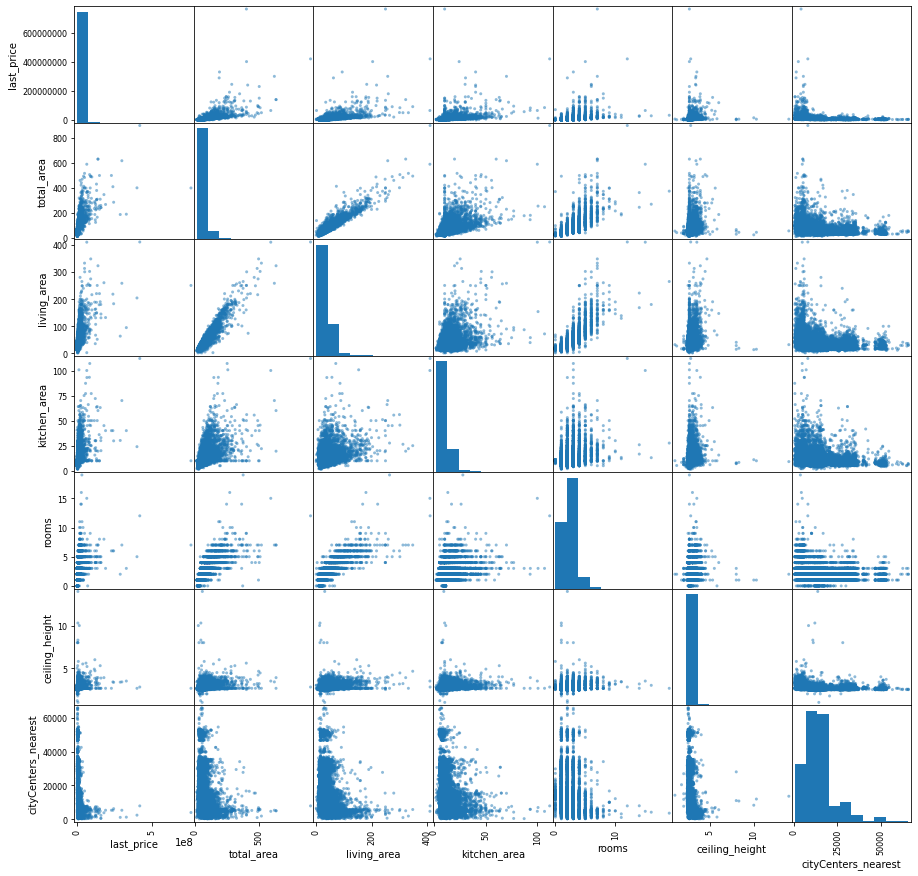

In [79]:
pd.plotting.scatter_matrix(data_price, figsize=(15, 15))
plt.show()

**4.3.1 Стоимость vs общая площадь**

наиболее значимая корреляция

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

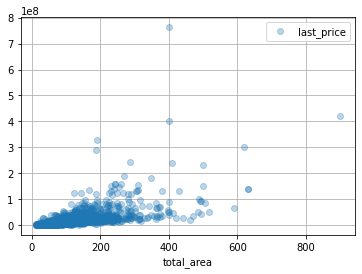

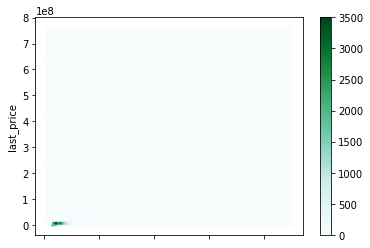

In [80]:
data_price.plot(x='total_area', y='last_price', style='o', alpha=0.3, grid=True)
data_price.plot(x='total_area', y='last_price', kind='hexbin')

Слишком большой разброс цен, поэтому посмотри только на те объекты, цена которых менее 6,5 млн - 75% выборки

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

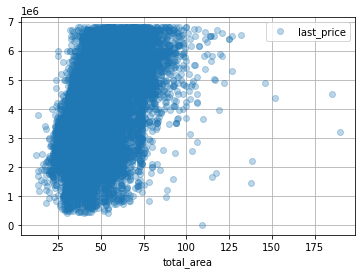

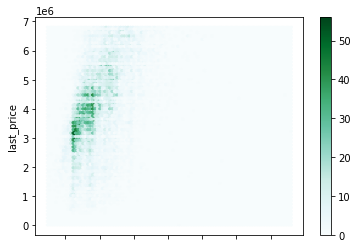

In [81]:
data75 = data_price.query('last_price <= 6800000')
data75.plot(x='total_area', y='last_price', style='o', alpha=0.3, grid=True)
data75.plot(x='total_area', y='last_price', kind='hexbin')

В целом по графику видно, что действительно есть некая зависимость. Хотелось бы построить линию регрессии или тренда, но мы пока этого не изучали

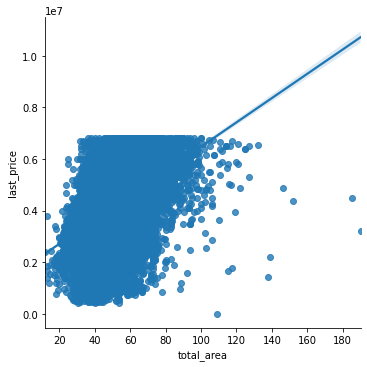

In [82]:
#но есть же seaborn
sns.lmplot(x='total_area', y='last_price', data=data75)

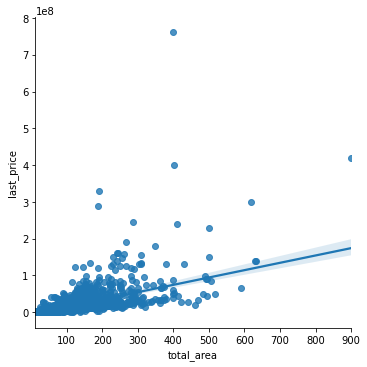

In [83]:
sns.lmplot(x='total_area', y='last_price', data=data_price)

**График с линией тренда является более наглядным, в т.ч. и на полном наборе данных без ограничений.** На последнем графике видно, что между ценой и общей площадью есть явная зависимость. Ваш КО

**4.3.2 Стоиомость vs. жилая площадь**

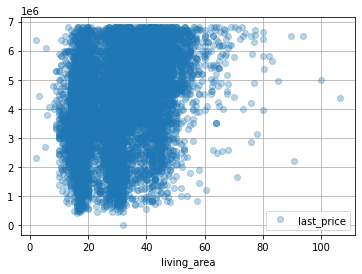

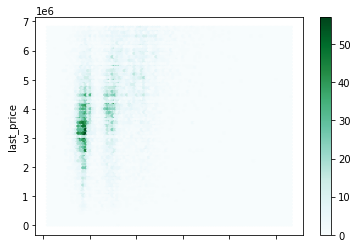

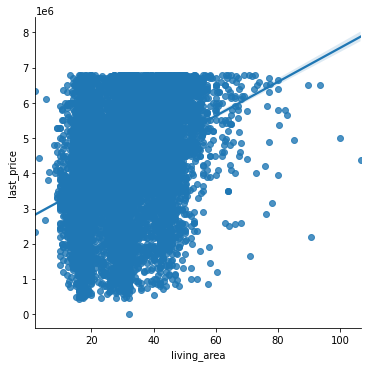

In [84]:
data75.plot(x='living_area', y='last_price', style='o', alpha=0.3, grid=True)
data75.plot(x='living_area', y='last_price', kind='hexbin')
sns.lmplot(x='living_area', y='last_price', data=data75)

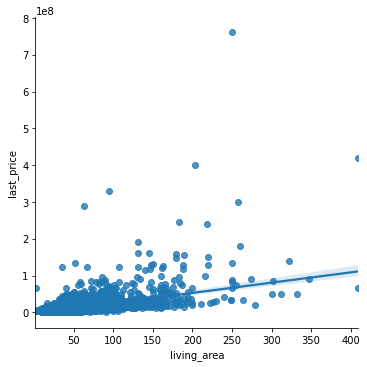

In [85]:
sns.lmplot(x='living_area', y='last_price', data=data_price)

По графикам видно, что также существует зависимость между ценой и жилой площадью

**4.3.3 Стоиомость vs. площадь кухни**

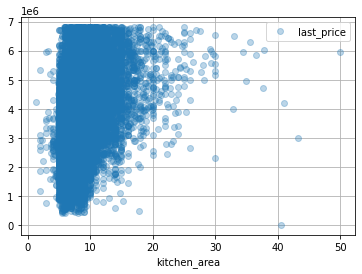

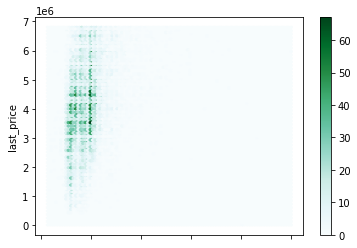

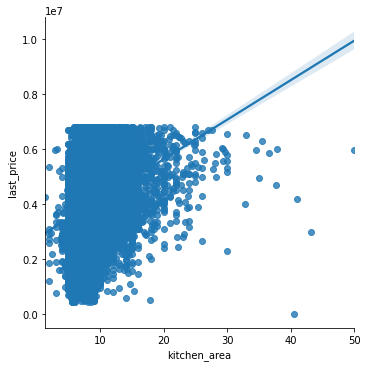

In [86]:
data75.plot(x='kitchen_area', y='last_price', style='o', alpha=0.3, grid=True)
data75.plot(x='kitchen_area', y='last_price', kind='hexbin')
sns.lmplot(x='kitchen_area', y='last_price', data=data75)

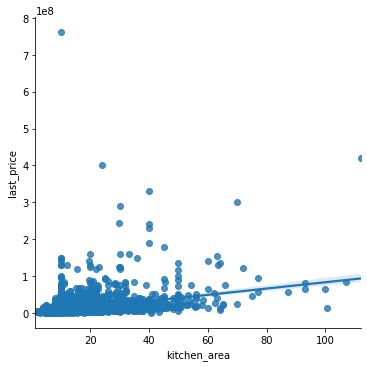

In [87]:
sns.lmplot(x='kitchen_area', y='last_price', data=data_price)

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

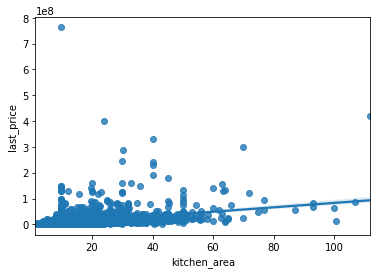

In [88]:
sns.regplot(x='kitchen_area', y='last_price', data=data_price)

В целом по графику видно, что есть некая зависимость стоимости от площадных кухни, но не такая явная как между ценой и общей площадью или жилой площадью 

Зависимость цены от площадных характеристик можно было бы показать нагляднее, если бы я умел отображать на графиках уравнения линий тренда. В описаниях .regplot(), lmplot() не нашел такого параметра. В других источниках для этого пишут отдельные функции и прочие танцы с бубном. В целом эти зависимости видно по таблице корреляций и уравнение регрессии возможно и не очень нужно, но можно было бы увидеть непосредственную зависимость переменных в виде функции 

**4.3.4 Стоимость vs колв-о комнат и высота потолков**

<AxesSubplot:xlabel='ceiling_height'>

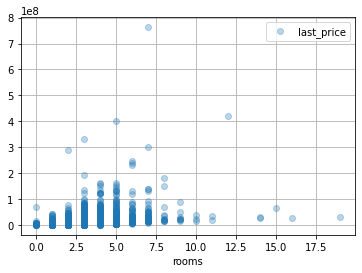

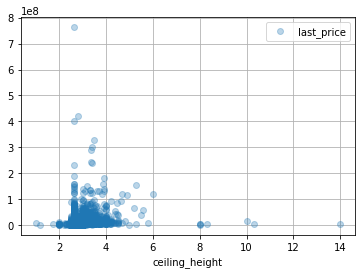

In [89]:
data_price.plot(x='rooms', y='last_price', style='o', alpha=0.3, grid=True)
data_price.plot(x='ceiling_height', y='last_price', style='o', alpha=0.3, grid=True)

<AxesSubplot:xlabel='ceiling_height'>

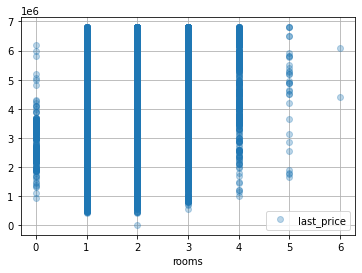

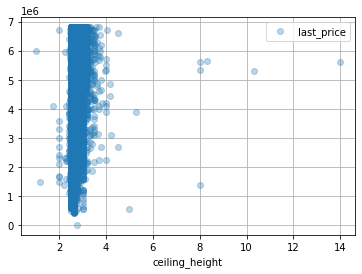

In [90]:
data75.plot(x='rooms', y='last_price', style='o', alpha=0.3, grid=True)
data75.plot(x='ceiling_height', y='last_price', style='o', alpha=0.3, grid=True)

Как и подозревали, количество комнат не сильно влияет на цену объекта, т.к. есть объекты с размым кол-вом комнат за одинаковую цену. С другой стороны на графике по всем данным (без ограничений цены) видно, что есть некая тенденция увеличения цены при увеличении кол-ва комнат до 5, а потом обратное падение. 

100% уверенности в том, что цена как-то зависит от высоты потолков, нет.

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Лучше после каждого графика (или серии тестов) писать вывод по полученным данным с учетом поставленной бизнес задачи - так проще читать проект, поскольку будущим коллегам или заказчику не надо будет самим интерпретировать результаты каждого теста или графика.

<div class="alert alert-info"> <b>Комментарии студента:</b> Понял, исправлюсь. Вписал пару комментов</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

👍🏻👍🏻👍🏻
</div>

**4.3.5 Стоимость vs расстояние до центра**

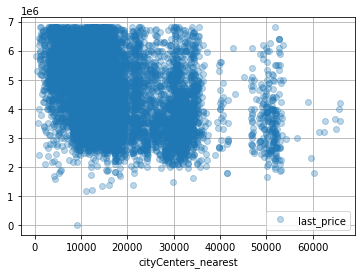

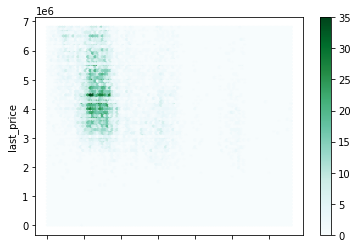

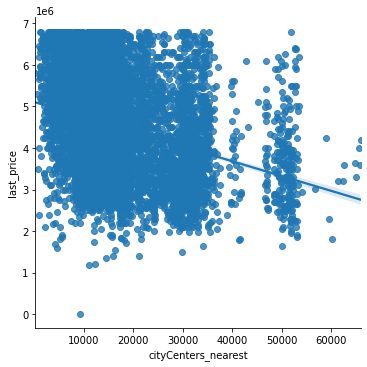

In [91]:
data75.plot(x='cityCenters_nearest', y='last_price', style='o', alpha=0.3, grid=True)
data75.plot(x='cityCenters_nearest', y='last_price', kind='hexbin')
sns.lmplot(x='cityCenters_nearest', y='last_price', data=data75)

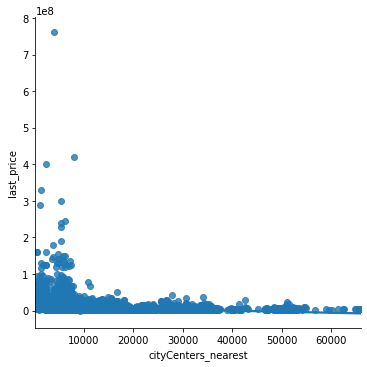

In [92]:
sns.lmplot(x='cityCenters_nearest', y='last_price', data=data_price)

В целом есть некоторая слабая зависимость между ценой и расстоянием до центра. На графике по даннм из всего массива без ограничение по цене такой зависимости яыно не видно, но для цен ниже 6,8 млн такая зависимость (обратная) есть.

**Общий вывод по 4.3**

Т.о. вявлена досточно сильная зависимость стоимости объекта от общей площади. Менее важными факторами, влияюш=щим на цену являются жилая плозадь и плозадь кухни. 

Высота потолков, кол-во комнат не являются факторами сильно вляиющими на цену.

Этаж и дата размещения никак не вляют на цену.

Удаленность от центра отрицательно влияет на цену, но зависимость между параметрами слабая (-0,2)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Верная интерпретация значений корреляции Пирсона
</div>

**4.4 Квадратный метр в 10 городах**

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23680 non-null  float64       
 13  balcony         

In [94]:
data_price['cityCenters_km'] = data['cityCenters_km']
data_price['one_metre_price'] = data['one_metre_price']
data_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   short_locality_name  23699 non-null  object 
 1   last_price           23699 non-null  int64  
 2   total_area           23699 non-null  float64
 3   living_area          21796 non-null  float64
 4   kitchen_area         23680 non-null  float64
 5   rooms                23699 non-null  int64  
 6   ceiling_height       23699 non-null  float64
 7   cityCenters_nearest  18180 non-null  float64
 8   cityCenters_km       18180 non-null  float64
 9   one_metre_price      23699 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 1.8+ MB


In [95]:
pivot_loc = data.pivot_table(index='short_locality_name', values='one_metre_price', aggfunc=['count','mean', 'median', 'min', 'max'])
pivot_loc.columns = ['count', 'mean', 'median', 'min', 'max']
pivot_top_loc = pivot_loc.sort_values(by='count', ascending=False).head(10)
pivot_top_loc_mean = pivot_top_loc.sort_values(by='mean', ascending=False)
pivot_top_loc_mean

,count,mean,median,min,max
short_locality_name,,,,,
Санкт-Петербург,15770,114785.190850,104715.15,111.8,1907500.0
Пушкин,369,103125.818157,100000.00,59836.1,256521.7
Кудрово,472,95324.928602,95675.45,54160.3,160401.0
Парголово,327,90175.915291,91642.90,39206.0,138522.4
Мурино,590,86087.510847,86175.65,50000.0,138580.2
Шушары,440,78677.363636,76876.20,47700.4,147826.1
Колпино,338,75424.581953,74723.75,47957.4,125000.0
Гатчина,307,68746.147231,67796.60,10507.2,146315.8
Всеволожск,398,68654.475628,65789.50,31400.0,640422.4


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Таблица верна. Совет: на общие продажи лучше смотреть через призму медианы. Она более устойчива к выбросам
</div>

<AxesSubplot:xlabel='short_locality_name'>

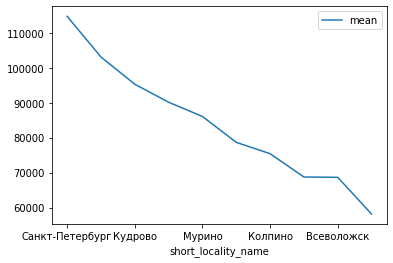

In [96]:
pivot_top_loc_mean.plot(y='mean', kind='line')

В 10-ке городов с наибольшим кол-вом объявлений наибольшие стоимости 1 кв.м. зафикисированы в:

- Санкт-Петербурге 114,7 тыс.
- Пушкине 103,1 тыс.
- Кудрово 95,3 тыс.

наименьшие стоимости 1 кв.м в:

- Гатчине 68,7 тыс.
- Всеволожске 68,6 тыс.
- Выборге 58,1 тыс.

Стоит спросить, как в выборку попал Выборг. Расстояние в 120 км считается?

**4.5 Цена километра**

In [97]:
data_price_spb = data_price.query('short_locality_name == "Санкт-Петербург"')

<AxesSubplot:xlabel='cityCenters_km'>

,last_price
cityCenters_km,
0.0,3.144912e+07
1.0,2.115871e+07
2.0,1.780829e+07
3.0,1.110271e+07
4.0,1.327061e+07
5.0,1.446081e+07
6.0,1.533842e+07
7.0,1.477515e+07
8.0,9.935921e+06


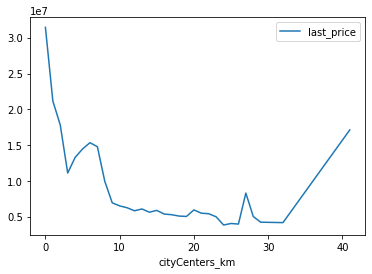

In [98]:
#median_price_per_km = data_price_spb['last_price'].median() / data_price_spb['cityCenters_km'].median()
#
#data_price_spb['cityCenters_km'] = data_price_spb['cityCenters_km'].fillna(data_price_spb['cityCenters_km'].median())
#data_price_spb.info()

#data_price_spb['km_price'] = data_price_spb['last_price'] / data_price_spb['cityCenters_km']
#data_price_spb['km_price'] = data_price_spb['km_price'].fillna(median_price_per_km)

pivot_price_per_km = data_price_spb.pivot_table(index='cityCenters_km', values='last_price', aggfunc='mean')
display(pivot_price_per_km.plot())
display(pivot_price_per_km)

Судя по данноу графику цена резко падает с каждым км. от центра в радиусе до 3 км, потом растет в радиусе 3-6 км (возможно это как-то связано с особенностями градостроительного планирования СпБ и развитием инфраструктуры в некоторых сегментах города)и опять резко падает в радиусе 6-9 км. Далее с каждым км. цена падает равномерно и не быстро.

Есть локальный пик в районе 25-27 км. Возможно, на таком расстоянии находится какой-нибудь элитный жилой район или пригород, например Петергоф, который явлется районом СпБ 

В данных присутсвует некий выброс на 41 км. Возможно на таком расстоянии также находится какая-нибудь недвижимость премиум класса также административно принадлежащая к территории СпБ

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Как думаешь, на каком км заканчивается центр Питера?
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Смотря, что считать центром.

Допустим, если стадион Зенит и Крестовский остров считать центром, то это центральная часть https://prnt.sc/QuKOBBy871bj ? Если за центр-центра принять середину Невского, на юге ограничить обводным каналом, на севере Невой и Финляндским вокзалом, на западе чуть чуть захватить Васильевский остров, на востоке Охотой Моллом - то получится прямоугольник 8х4,5 км.

</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Немного не так. Я имел ввиду - определить по графику. Я бы сказал, что граница находтся на 8км
</div>

### Общий вывод

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод

**Общий вывод**

В рамках работы было произведено преобразование данных, в т.ч.заполнение пропусков, поиск аномалий и неявных дубликатов, приведение к общему виду, изменение типов данных. Часть пропущенных данных не преобразовывалось, т.к. для заполнение пропусков могло привести к дополнительным ошибкам в будущих рассчетах. Скорее всего чатсь этих пропущенных данных не выгрузились во время формирования массива.

1) **Произведена замена следующих пропущенных данных** 
- замена пустых is_apartment на False
- замена пустых locality_name на "Санкт-Петербург"
- замена пустых balcony на 0
- замена пустых ceiling_height на медианное по набору
- замена пустых floors_total на соответствующее значение из floor, где отсутствуют пропуски
- замена пустых значений kitchen_area, living_area, days_exposition на медианное по городу

2) **Заменены аномальные значения ceiling_height**
3) **Приведены к общему виду наименования населенных пунктов - выявлены неявные дубликаты**

4) **Изучены отдельные параметры** на предмет ненормальности распределения. Описан среднестатистический объект, который высталвен на продажу.

5) **Набор дополнен дополнительными расчтеными атрибутами**

6) **Изучена зависимость цены объекта от других атрибутов и характристик объекта.** Выявлено, что наибольшее влияние на цену имеет прааметр общей площади, меньшие зависимости цены от жилой плоади и площади кухни. Также на стоимость влияет удаленность от центра. Ряд предлагаемых для анализа параметров совершенно никак не вляет на стоимость и корреляция между ними и ценой объекта очень слабая

7) **Определена средняя цена квадратного метра в разлиных города.** Как и следовало ожидать наибольшая цена в СпБ

8) **Изучена зависимость стоимости от расстояния до центра СпБ.** Стоимость резко падает при удалении от центра города, более пологий тренд наблюдается на расстоянии от 10 км от центра. Есть ряд локальных пиков на большом удалении от центра (возможно там элитное жильё)





<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Шикарный вывод и рекомендации для бизнеса. Кстати, хорошей практикой является написание в общем выводе всех твоих действий (кратко) по проекту. Ведь вывод раскрывает для заказчика всю твою проделанную работу и за что он платит деньги, даже если ему не интересен весь процесс исследования, то в отчёт он заглянет обязательно. Ты молодец!
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Спасибо</div>

<div class="alert alert-block alert-warning">📝
Комментарий от ревьюера №1 </b> 



У тебя получилась очень сильная и хорошая работа. Здорово, что расчеты ты сопровождаешь иллюстрациями, а так же не забываешь про комментарии, твой проект интересно проверять. 

---

Нужно поправить:


1) Уменьшить range, чтобы рассмотреть пики

2) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Добавил</div>

<div class="alert alert-block alert-success">✔️
    

__Коментарий от ревьюера №2__


В остальном всё чудно😊. Твой проект так и просится на github =)   
    
Поздравляю с успешным завершением проекта 😊👍
И желаю успехов в новых работах 😊
</div>